In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/Users/singhanyadav/Documents/Python/data science projects/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.shape

(284807, 31)

In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt

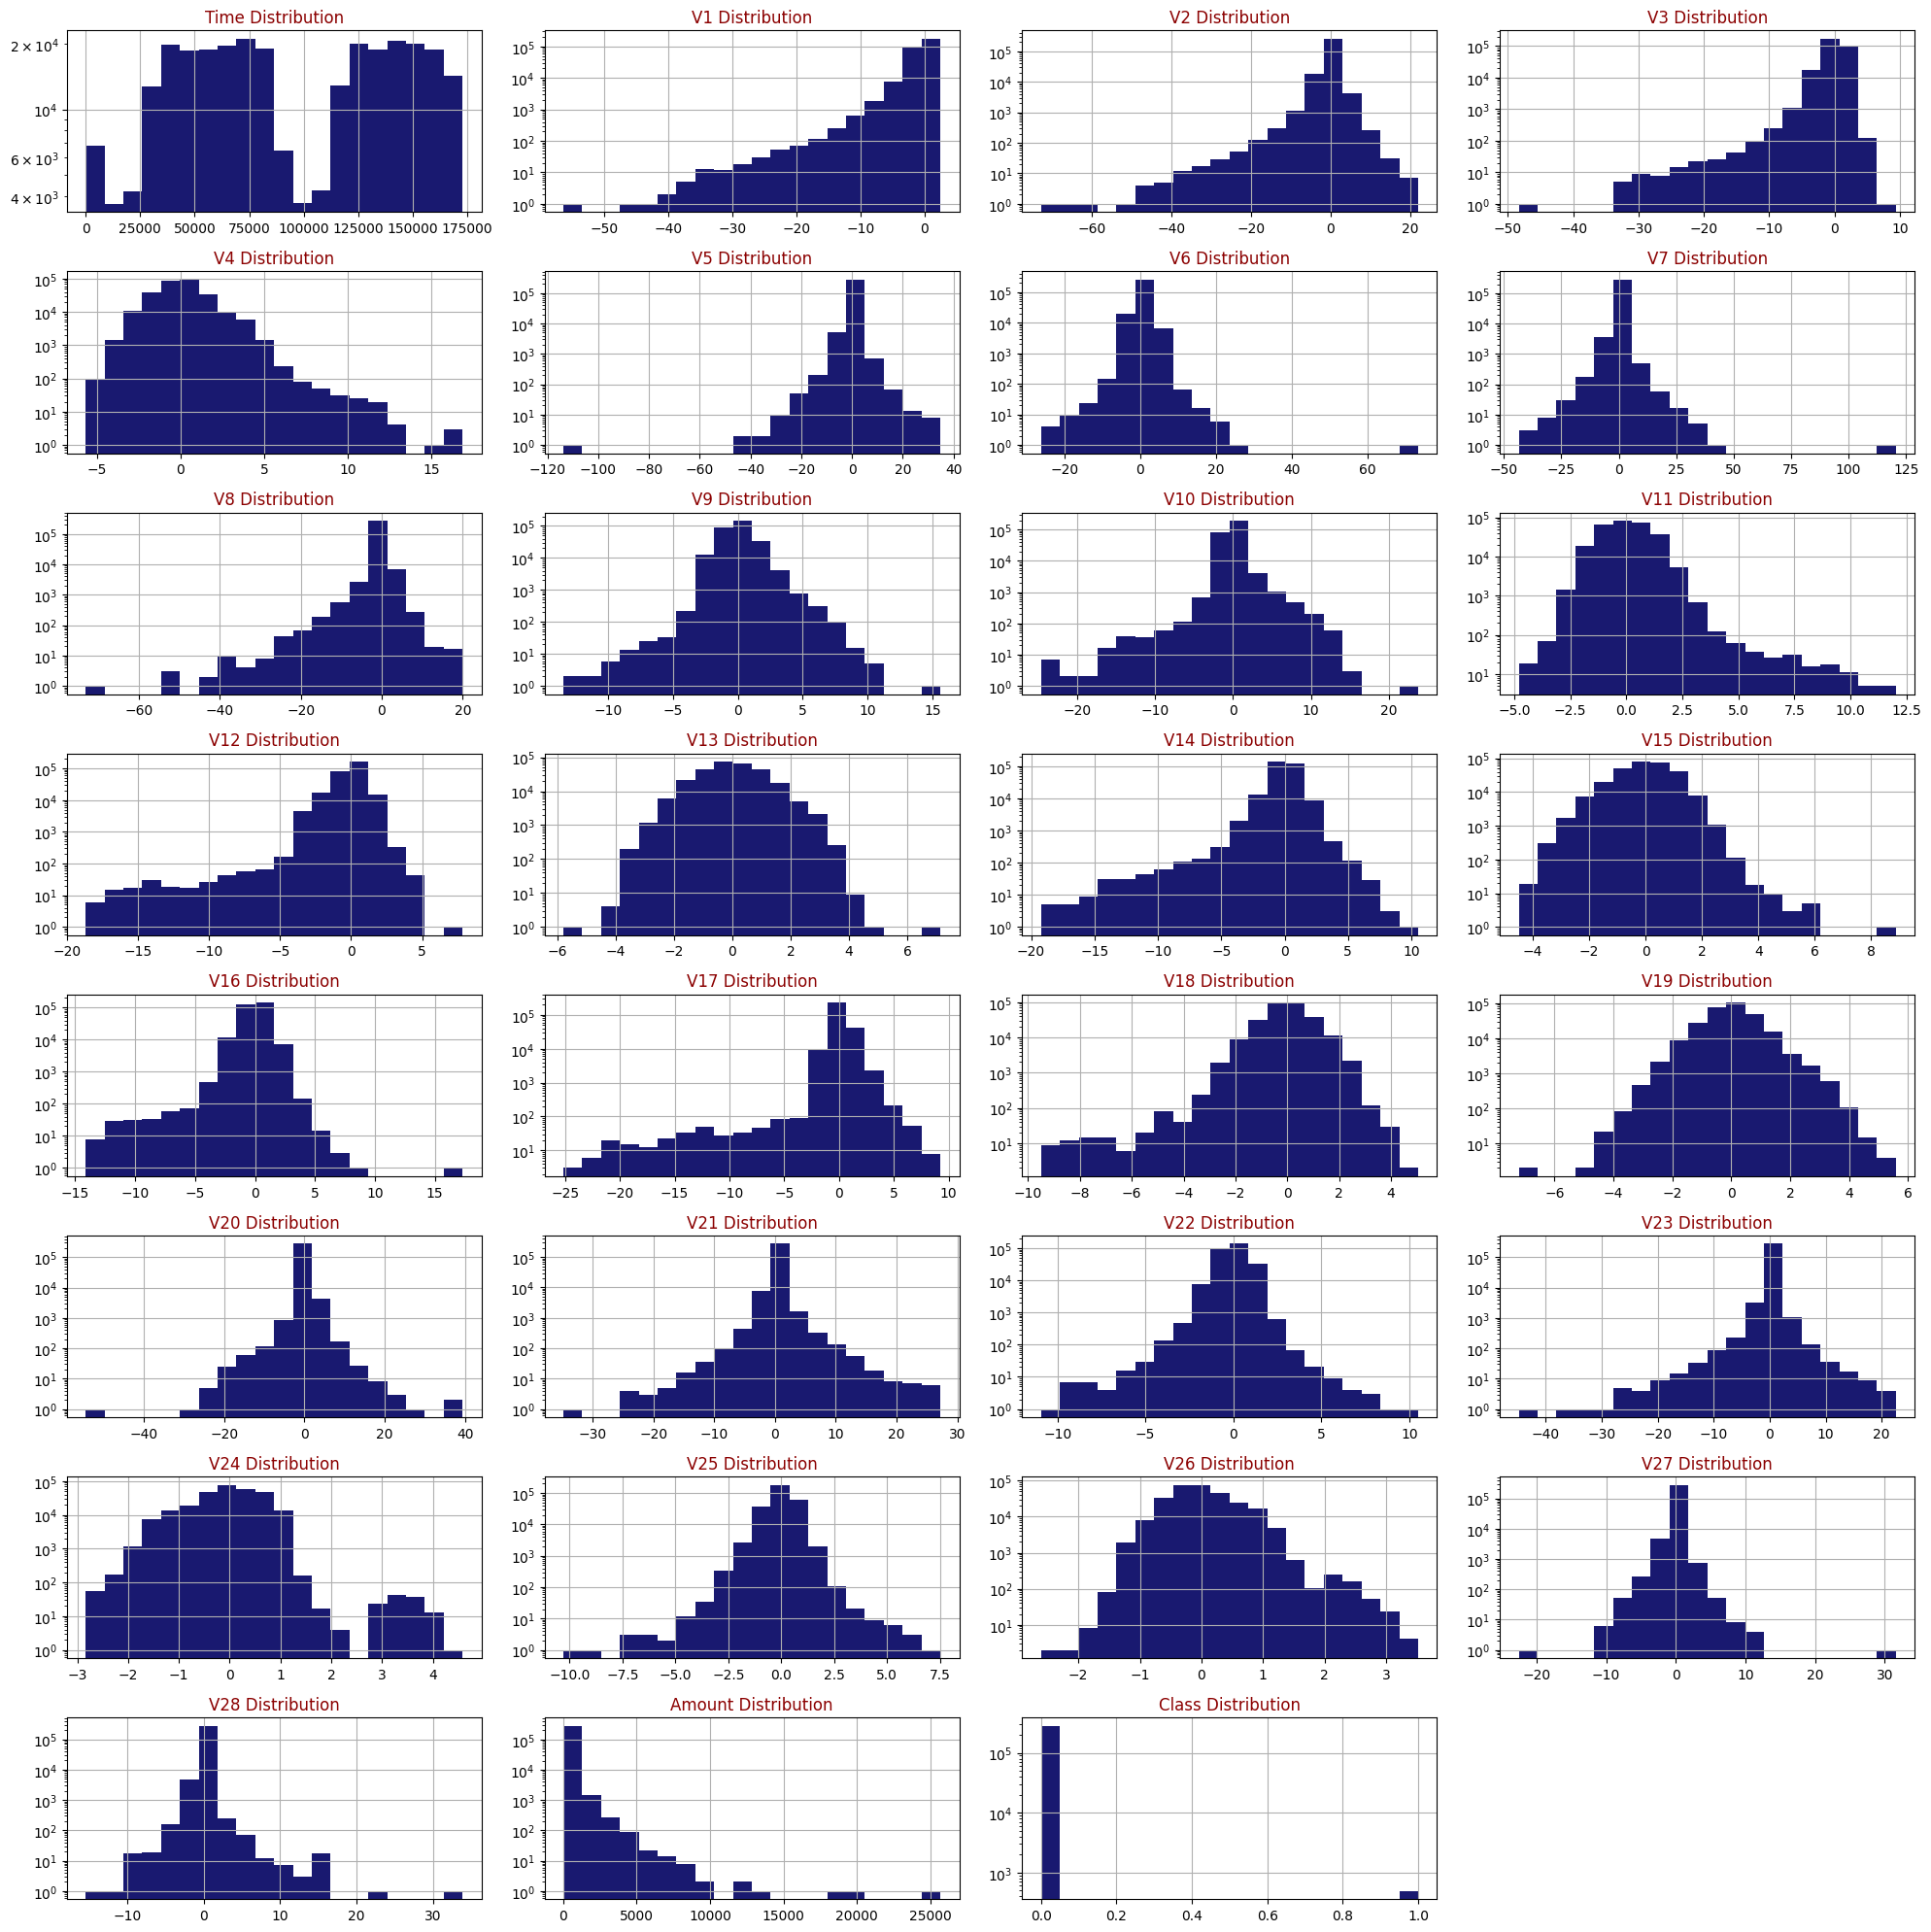

In [8]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df,df.columns,8,4)

In [9]:
#### Independent and Dependent Features
X=df.drop("Class",axis=1)
y=df.Class

<span style="font-size:25px">Logistic Regression</span>

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [11]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [14]:
y_pred=clf.predict(X_test)

In [15]:
import seaborn as sns

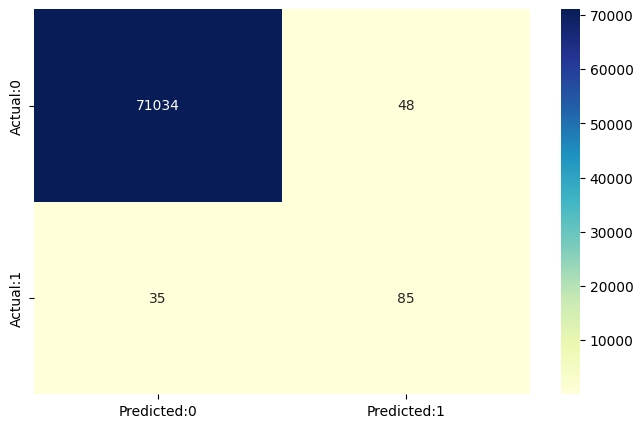

In [16]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [17]:
print(accuracy_score(y_test,y_pred))

0.9988343024072357


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.64      0.71      0.67       120

    accuracy                           1.00     71202
   macro avg       0.82      0.85      0.84     71202
weighted avg       1.00      1.00      1.00     71202



<span style="font-size:25px">Random Forest Classifier :</span>


In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [20]:
y_pred=classifier.predict(X_test)

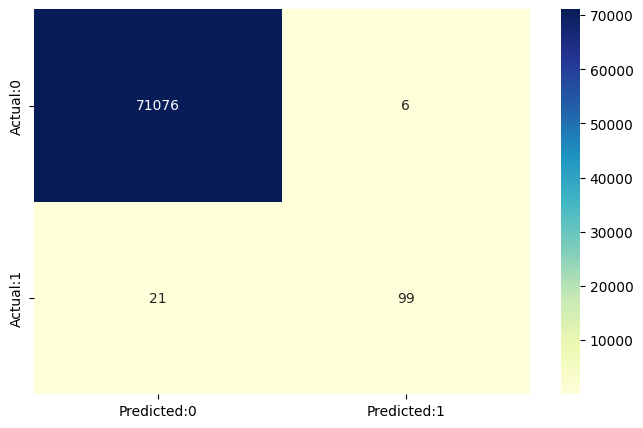

In [21]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [22]:
print(accuracy_score(y_test,y_pred))

0.9996207971686188


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.94      0.82      0.88       120

    accuracy                           1.00     71202
   macro avg       0.97      0.91      0.94     71202
weighted avg       1.00      1.00      1.00     71202



<span style="font-size:25px">Performing Under Sampling : NearMiss</span>

<span style="font-size:20px">Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.

NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.

NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.

NearMiss-3: Majority class examples with minimum distance to each minority class example.

</span>



In [24]:
from collections import Counter
Counter(y_train)

Counter({0: 213233, 1: 372})

In [26]:
from collections import Counter
from imblearn.under_sampling import NearMiss

# Initialize NearMiss
ns = NearMiss(version=1, n_neighbors=3)

# Use fit_resample instead of fit_sample
X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)

# Print class distribution before and after resampling
print("The number of classes before fit: {}".format(Counter(y_train)))
print("The number of classes after fit: {}".format(Counter(y_train_ns)))


The number of classes before fit: Counter({0: 213233, 1: 372})
The number of classes after fit: Counter({0: 372, 1: 372})


In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [28]:
y_pred=classifier.predict(X_test)

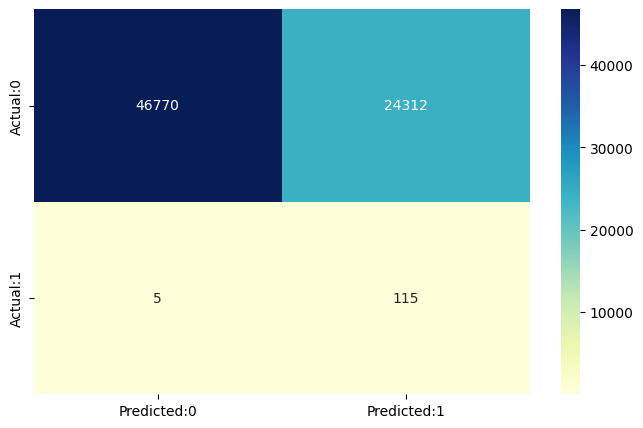

In [29]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [30]:
print(accuracy_score(y_test,y_pred))


0.6584786944186961


In [31]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.66      0.79     71082
           1       0.00      0.96      0.01       120

    accuracy                           0.66     71202
   macro avg       0.50      0.81      0.40     71202
weighted avg       1.00      0.66      0.79     71202



In [ ]:
<span style="font-size:25px"></span>


In [37]:
from imblearn.combine import SMOTETomek

In [39]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Initialize SMOTETomek
os = SMOTETomek(random_state=42)

# Use fit_resample instead of fit_sample
X_train_ns, y_train_ns = os.fit_resample(X_train, y_train)

# Print class distribution before and after resampling
print("The number of classes before fit: {}".format(Counter(y_train)))
print("The number of classes after fit: {}".format(Counter(y_train_ns)))


The number of classes before fit: Counter({0: 213233, 1: 372})
The number of classes after fit: Counter({0: 212514, 1: 212514})


In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [41]:
y_pred=classifier.predict(X_test)

In [42]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

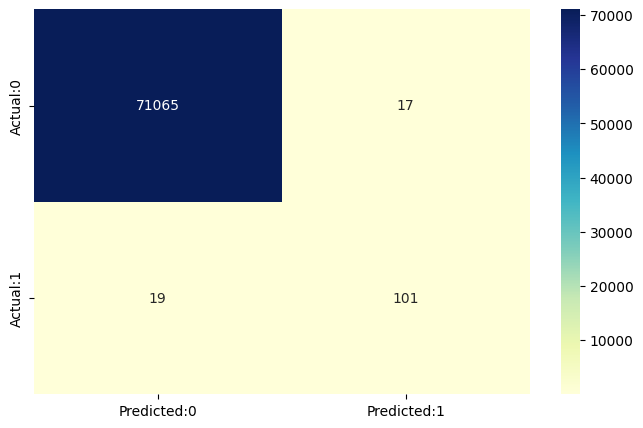

In [43]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [44]:
print(accuracy_score(y_test,y_pred))

0.9994943962248252


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.86      0.84      0.85       120

    accuracy                           1.00     71202
   macro avg       0.93      0.92      0.92     71202
weighted avg       1.00      1.00      1.00     71202

